In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
c1 = df[df['SEVERITYCODE'] == 1].count()['SEVERITYCODE']
c1

136485

In [7]:
c2 = df[df['SEVERITYCODE'] == 2].count()['SEVERITYCODE']
c2

58188

In [8]:
import seaborn as sns

<AxesSubplot:>

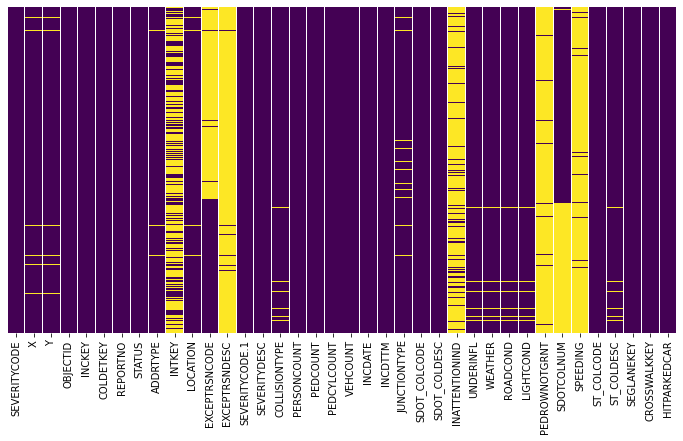

In [9]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.drop(columns=['SPEEDING','SDOTCOLNUM','PEDROWNOTGRNT','INATTENTIONIND'
                    ,'EXCEPTRSNDESC','EXCEPTRSNCODE', 'INTKEY'],inplace=True)

In [11]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

<AxesSubplot:>

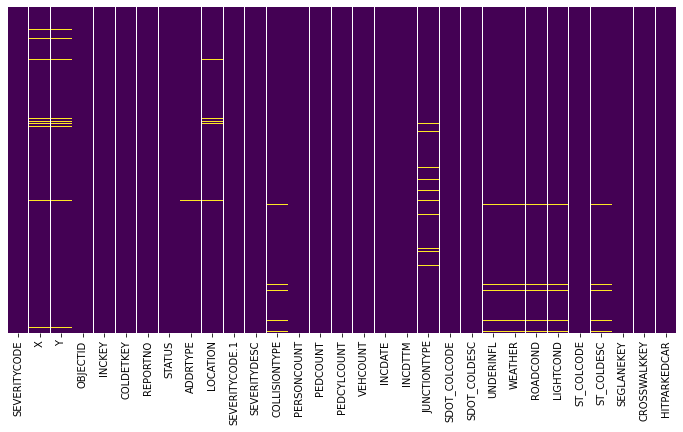

In [12]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
new_collision = df.dropna()

<AxesSubplot:>

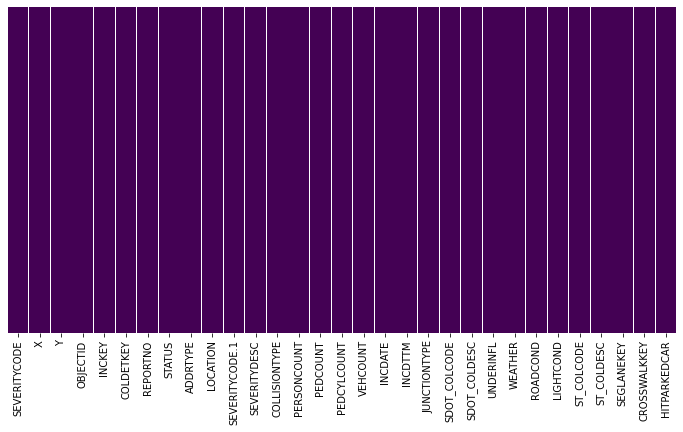

In [14]:
plt.figure(figsize = (12,6))
sns.heatmap(new_collision.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
new_collision.shape

(180067, 31)

In [16]:
new_collision['INCDATE'] = pd.to_datetime(new_collision['INCDATE'])
new_collision['Hour'] = new_collision['INCDATE'].apply(lambda time: time.hour)
new_collision['Month'] = new_collision['INCDATE'].apply(lambda time: time.month)
new_collision['Day of Week'] = new_collision['INCDATE'].apply(lambda time: time.dayofweek)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
new_collision['Day of Week'] = new_collision['Day of Week'].map(dmap)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

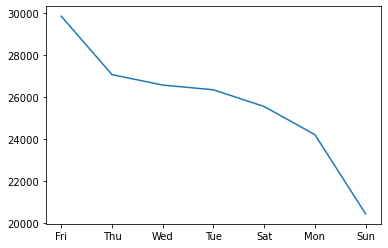

In [18]:
new_collision['Day of Week'].value_counts().plot(kind = 'line')


In [19]:
new_collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Hour',
       'Month', 'Day of Week'],
      dtype='object')

In [20]:
new_collision["INCDATE"]

0        2013-03-27 00:00:00+00:00
1        2006-12-20 00:00:00+00:00
2        2004-11-18 00:00:00+00:00
3        2013-03-29 00:00:00+00:00
4        2004-01-28 00:00:00+00:00
                    ...           
194668   2018-11-12 00:00:00+00:00
194669   2018-12-18 00:00:00+00:00
194670   2019-01-19 00:00:00+00:00
194671   2019-01-15 00:00:00+00:00
194672   2018-11-30 00:00:00+00:00
Name: INCDATE, Length: 180067, dtype: datetime64[ns, UTC]

Text(0.5, 1.0, 'Top 10 Weather Condition for accidents')

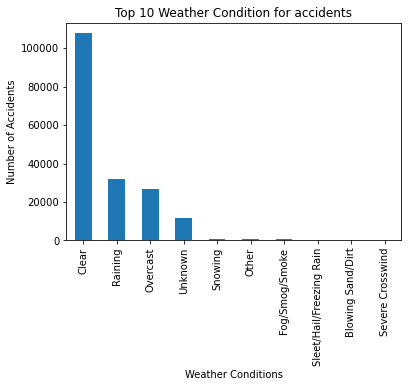

In [21]:
fig, ax=plt.subplots()
new_collision['WEATHER'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5, align='center')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
ax.tick_params()
plt.title('Top 10 Weather Condition for accidents')

<AxesSubplot:xlabel='UNDERINFL', ylabel='count'>

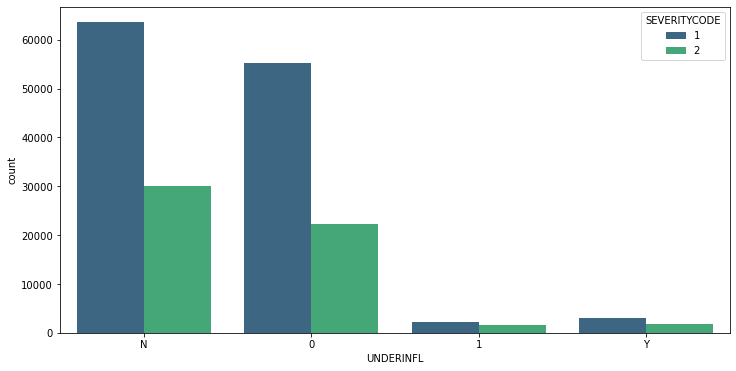

In [22]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'UNDERINFL', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')


<AxesSubplot:xlabel='ROADCOND', ylabel='count'>

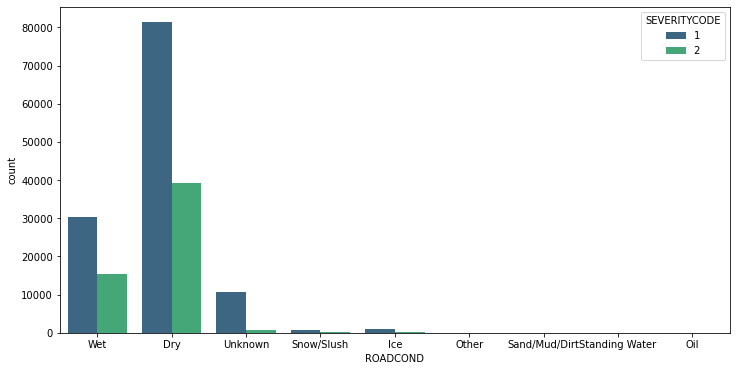

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'ROADCOND', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')


<AxesSubplot:xlabel='WEATHER', ylabel='count'>

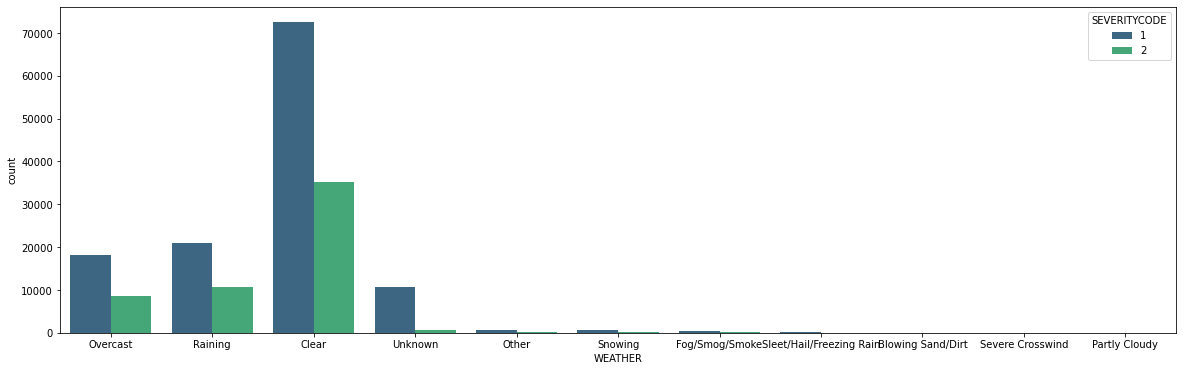

In [24]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'WEATHER', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')


<AxesSubplot:xlabel='Day of Week', ylabel='count'>

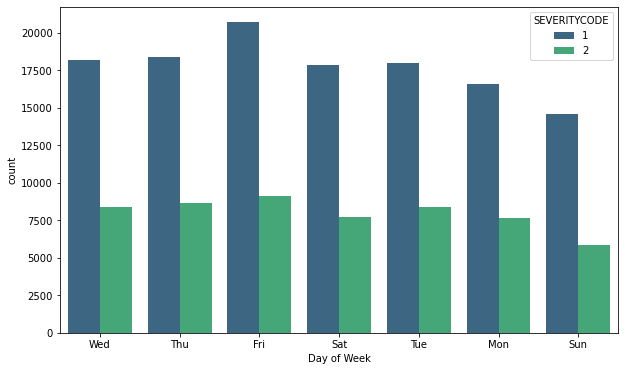

In [25]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Day of Week', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

<AxesSubplot:xlabel='Month', ylabel='count'>

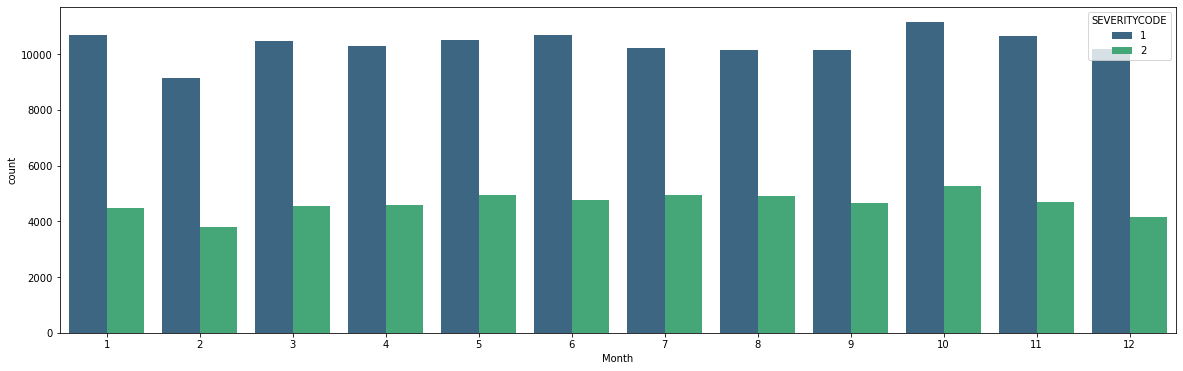

In [26]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Month', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')


In [27]:
new_collision['Total'] = new_collision['INCKEY'].count()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='COLLISIONTYPE', ylabel='count'>

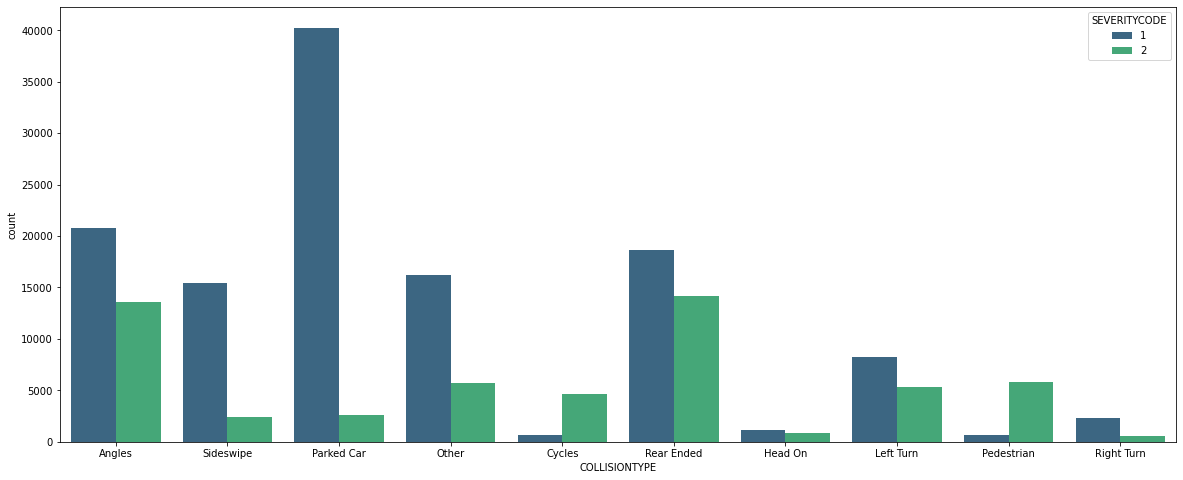

In [28]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'COLLISIONTYPE', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')


[(-1.0, 9.0)]

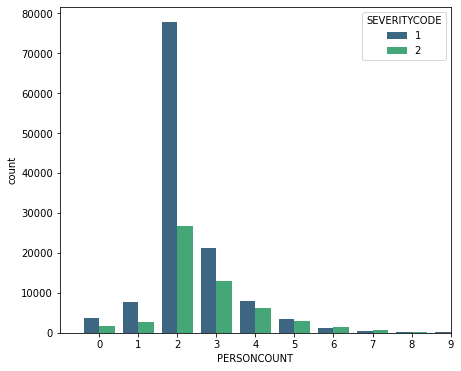

In [29]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'PERSONCOUNT', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')
set.set(xlim=(-1,9))

In [30]:
new_collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Hour',
       'Month', 'Day of Week', 'Total'],
      dtype='object')

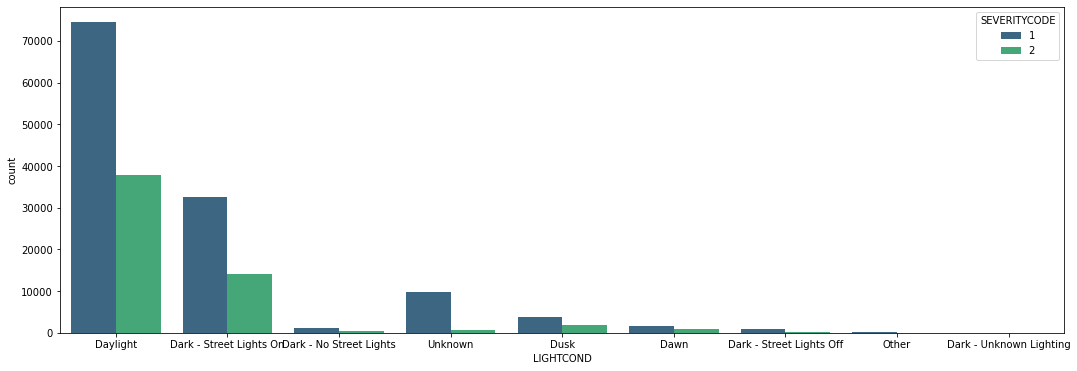

In [31]:
plt.figure(figsize = (18,6))
set = sns.countplot(x = 'LIGHTCOND', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

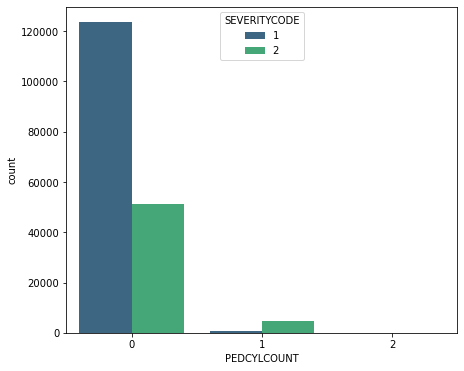

In [32]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'PEDCYLCOUNT', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

[(0.0, 6.0)]

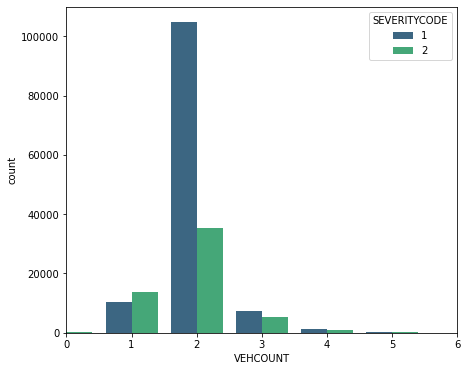

In [33]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'VEHCOUNT', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')
set.set(xlim=(0,6))


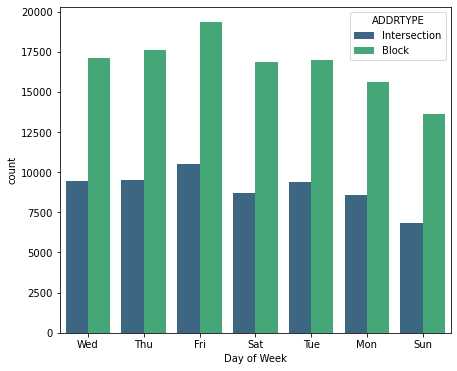

In [34]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'Day of Week', data = new_collision , 
              hue = 'ADDRTYPE', palette = 'viridis')


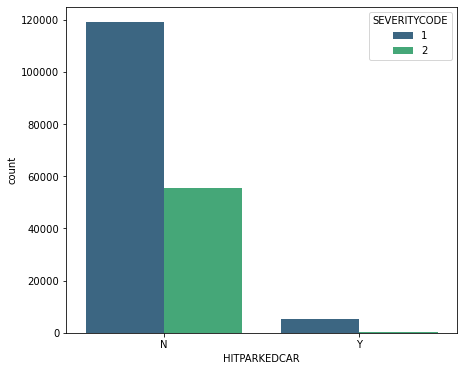

In [35]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'HITPARKEDCAR', data = new_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')


In [36]:
new_collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Hour',
       'Month', 'Day of Week', 'Total'],
      dtype='object')

In [37]:
log_df = new_collision[['SEVERITYCODE','Month', 'Day of Week','COLLISIONTYPE', 'PERSONCOUNT', 
          'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','ADDRTYPE','LIGHTCOND','WEATHER', 'ROADCOND',
          'HITPARKEDCAR']]


In [38]:
log_df.head()

,SEVERITYCODE,Month,Day of Week,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE,LIGHTCOND,WEATHER,ROADCOND,HITPARKEDCAR
0,2,3,Wed,Angles,2,0,0,2,Intersection,Daylight,Overcast,Wet,N
1,1,12,Wed,Sideswipe,2,0,0,2,Block,Dark - Street Lights On,Raining,Wet,N
2,1,11,Thu,Parked Car,4,0,0,3,Block,Daylight,Overcast,Dry,N
3,1,3,Fri,Other,3,0,0,3,Block,Daylight,Clear,Dry,N
4,2,1,Wed,Angles,2,0,0,2,Intersection,Daylight,Raining,Wet,N


In [39]:
dmap_day = {'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5, 'Sat':6,'Sun':7}


In [40]:
log_df['Day of Week'] = new_collision['Day of Week'].map(dmap_day)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
dmap_collision = {'Parked Car':1,'Angles':2,'Rear Ended':3,'Other':4,'Sideswipe':5, 
                  'Left Turn':6,'Left Turn':7, 'Pedestrian':8, 'Cycles':9, 'Right Turn':10,
                 'Head On':11}

log_df['COLLISIONTYPE'] = new_collision['COLLISIONTYPE'].map(dmap_collision)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [42]:
log_df['COLLISIONTYPE']

0          2
1          5
2          1
3          4
4          2
          ..
194668    11
194669     3
194670     7
194671     9
194672     3
Name: COLLISIONTYPE, Length: 180067, dtype: int64

In [43]:
dmap_address = {'Block':1,'Intersection':2}

In [44]:
log_df['ADDRTYPE'] = log_df['ADDRTYPE'].map(dmap_address)
log_df['ADDRTYPE'].value_counts()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    117085
2     62982
Name: ADDRTYPE, dtype: int64

In [45]:
dmap_light = {'Daylight':1,'Dark - Street Lights On':2,'Unknown':3,'Dusk':4,'Dawn':5, 
                  'Dark - No Street Lights':6,'Dark - Street Lights Off':7, 
              'Other':8, 'Dark - Unknown Lighting':9}

log_df['LIGHTCOND'] = log_df['LIGHTCOND'].map(dmap_light)
log_df['WEATHER'].value_counts()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Clear                       107692
Raining                      31719
Overcast                     26809
Unknown                      11505
Snowing                        875
Other                          728
Fog/Smog/Smoke                 549
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [46]:
dmap_weather = {'Clear':1,'Raining':2,'Overcast':3,'Unknown':4,'Snowing':5, 
                  'Other':6,'Fog/Smog/Smoke':7, 
              'Sleet/Hail/Freezing Rain':8, 'Blowing Sand/Dirt':9, 'Severe Crosswind':10,
               'Partly Cloudy': 11}

log_df['WEATHER'] = log_df['WEATHER'].map(dmap_weather)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
dmap_roadcond = {'Dry':1,'Wet':2,'Unknown':3,'Ice':4,'Snow/Slush':5, 
                  'Other':6,'Standing Water':7, 
              'Sand/Mud/Dirt':8, 'Oil': 9}


In [48]:
log_df['ROADCOND'] = log_df['ROADCOND'].map(dmap_roadcond)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
dmap_hitcar = {'N':1,'Y':2}

In [50]:
log_df['HITPARKEDCAR'] = log_df['HITPARKEDCAR'].map(dmap_hitcar)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
log_df.head()

,SEVERITYCODE,Month,Day of Week,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE,LIGHTCOND,WEATHER,ROADCOND,HITPARKEDCAR
0,2,3,3,2,2,0,0,2,2,1,3,2,1
1,1,12,3,5,2,0,0,2,1,2,2,2,1
2,1,11,4,1,4,0,0,3,1,1,3,1,1
3,1,3,5,4,3,0,0,3,1,1,1,1,1
4,2,1,3,2,2,0,0,2,2,1,2,2,1


In [52]:
log_df.columns

Index(['SEVERITYCODE', 'Month', 'Day of Week', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'ADDRTYPE', 'LIGHTCOND',
       'WEATHER', 'ROADCOND', 'HITPARKEDCAR'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = log_df[['Month', 'Day of Week', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','ADDRTYPE', 'LIGHTCOND',
       'WEATHER', 'ROADCOND', 'HITPARKEDCAR']]
y = log_df['SEVERITYCODE']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
#Lets Try Logistic Regression
from sklearn.linear_model import LogisticRegression

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import log_loss

Test  0 : Accuracy at c = 0.1 solver= newton-cg is :  0.5345741840397269


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Test  1 : Accuracy at c = 0.1 solver= lbfgs is :  0.5345347003975592
Test  2 : Accuracy at c = 0.1 solver= liblinear is :  0.5345645832395389
Test  3 : Accuracy at c = 0.1 solver= sag is :  0.5345728236325266


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test  4 : Accuracy at c = 0.1 solver= saga is :  0.5345710221802565
Test  5 : Accuracy at c = 0.01 solver= newton-cg is :  0.5359863215743258


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Test  6 : Accuracy at c = 0.01 solver= lbfgs is :  0.535887532774314
Test  7 : Accuracy at c = 0.01 solver= liblinear is :  0.5359710440224773
Test  8 : Accuracy at c = 0.01 solver= sag is :  0.5359848186368288


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test  9 : Accuracy at c = 0.01 solver= saga is :  0.5359823193657574
Test  10 : Accuracy at c = 0.001 solver= newton-cg is :  0.5482358069526702
Test  11 : Accuracy at c = 0.001 solver= lbfgs is :  0.5482351906171882
Test  12 : Accuracy at c = 0.001 solver= liblinear is :  0.549707894444239
Test  13 : Accuracy at c = 0.001 solver= sag is :  0.5482355642632064
Test  14 : Accuracy at c = 0.001 solver= saga is :  0.5482349010800136


Text(0, 0.5, 'Testing Accuracy')

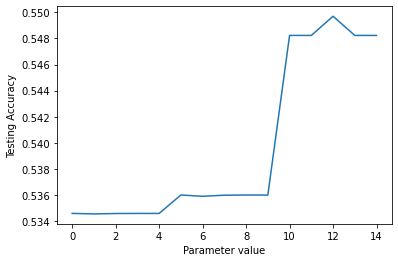

In [58]:
c_list = [0.1, 0.01, 0.001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
idx = []

accuracy_score = []
for idx1, c in enumerate(c_list):
    for idx2, sol in enumerate(solver_list):
        idx.append(idx2 + idx1 * 5)
        # perform the test
        LR = LogisticRegression(C=c, solver=sol).fit(X_train, y_train)
        # it can predict the outcome
        lr_yhat = LR.predict(X_test)
        lr_prob = LR.predict_proba(X_test)
        print("Test ", (idx2 + idx1 * 5), ": Accuracy at c =", c,"solver=", sol,
              "is : ", log_loss(y_test, lr_prob))
        accuracy_score.append(log_loss(y_test, lr_prob))
lr_prob = LR.predict_proba(X_test)
log_loss(y_test, lr_prob)
# plot the relationship between K and testing accuracy
plt.plot(idx, accuracy_score)
plt.xlabel('Parameter value')
plt.ylabel('Testing Accuracy')

In [59]:
logmodel = LogisticRegression(C=0.001, solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
predictions = logmodel.predict(X_test)

In [62]:
from sklearn.metrics import jaccard_similarity_score

In [63]:
lr_yhat = LR.predict(X_test)
jc4 = round(jaccard_similarity_score(y_test, lr_yhat), 2)
jc4

0.74

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.74      0.96      0.83     37366
           2       0.71      0.24      0.36     16655

   micro avg       0.74      0.74      0.74     54021
   macro avg       0.72      0.60      0.60     54021
weighted avg       0.73      0.74      0.69     54021



In [65]:
print(confusion_matrix(y_test,predictions))

[[35701  1665]
 [12592  4063]]


In [66]:
logmodel.score(X_test, y_test)

0.7360841154365895

In [67]:
#Lets Try KNN
from sklearn.neighbors import KNeighborsClassifier


Test set Accuracy at k= 1 :  0.6756631680272487
Test set Accuracy at k= 2 :  0.7169434108957627
Test set Accuracy at k= 3 :  0.7046704059532404
Test set Accuracy at k= 4 :  0.7286795875677977
Test set Accuracy at k= 5 :  0.7183317598711613
Test set Accuracy at k= 6 :  0.7309379685677792
Test set Accuracy at k= 7 :  0.7237555765350512
Test set Accuracy at k= 8 :  0.7340108476333278
Test set Accuracy at k= 9 :  0.7283648951333741


Text(0, 0.5, 'Testing Accuracy')

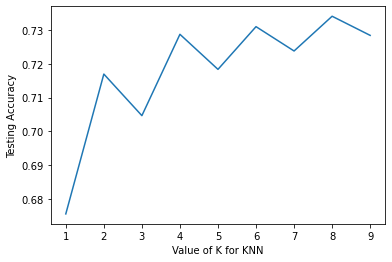

In [68]:
k_range = range(1,10)
accy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    knn_yhat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k,": ", jaccard_similarity_score(y_test,knn_yhat))
    accy_score.append(jaccard_similarity_score(y_test, knn_yhat))

plt.plot(k_range, accy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [69]:
from sklearn.neighbors import KNeighborsClassifier
# perform the test
KNN = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [70]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [71]:
knn_yhat = KNN.predict(X_test)
jc1 = round(jaccard_similarity_score(y_test, knn_yhat), 2)
jc1

0.73

In [72]:
fs1 = round(f1_score(y_test, knn_yhat, average='weighted'), 2)
fs1

0.71

In [73]:
KNN.score(X_test, y_test)

0.7340108476333278

In [74]:
# Lets try Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

In [75]:
d_range = range(3, 6)
f1 = []
ja = []
for d in d_range:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    DT.fit(X_train, y_train)
    dt_yhat = DT.predict(X_test)
    f1.append(f1_score(y_test, dt_yhat, average='weighted'))
    ja.append(jaccard_similarity_score(y_test, dt_yhat))

result = pd.DataFrame(f1, index=['d=3','d=4', 'd=5'])
result.columns = ['F1-score']
result.insert(loc=1, column='Jacard', value=ja)
result.columns.name = "Depth"
result

Depth,F1-score,Jacard
d=3,0.679118,0.743137
d=4,0.679118,0.743137
d=5,0.707589,0.749505


In [76]:
from sklearn.tree import DecisionTreeClassifier
# prepare DT setting
DT = DecisionTreeClassifier(criterion="entropy", max_depth=5)
# perform the test
DT.fit(X_train, y_train)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
dt_yhat = DT.predict(X_test)
jc2 = round(jaccard_similarity_score(y_test, dt_yhat), 2)
jc2

0.75

In [78]:
fs2 = round(f1_score(y_test, dt_yhat, average='weighted'), 2)
fs2

0.71